# Exploratory Data Analysis of Time Series 

We will prepare the time series data for forecasting models.

In [1]:
# import necessary Python packages 
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
# adjust the format of the dataset
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

## Time Series Exploration and Understanding

We will show how to explore, analyse, and understand time series data.

In [3]:
ts_data = pd.read_csv('train.csv')

### Get Started

The head() functions returns the first 5 rows of the time series data set to get an overview of the structure and type of data.

In [4]:
ts_data.head(5)

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [5]:
ts_data.tail(5)

,Date,store,product,number_sold
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899
230089,2018-12-31,6,9,912


The dataset contains the daily date time stamp column, the store, the product, and the number sold.

It is important to know whether the dataset contains missing values. For this reason, we use the isna() function.

In [6]:
ts_data.isna().sum()

Date           0
store          0
product        0
number_sold    0
dtype: int64

We do not have any missing values. Now we would like to understand the format of the data. For this reason, we will use the pandas dtypes function.

In [7]:
ts_data.dtypes

Date           object
store           int64
product         int64
number_sold     int64
dtype: object

The store, the product, and the number sold columns are integers that occupies 64 bits of storage. The date column is in  string format. 

In [8]:
ts_data.index

RangeIndex(start=0, stop=230090, step=1)

In addition, it is Range index. It is required to convert it into date time index format. 

In [9]:
len(ts_data['Date'].unique())

3287

There are 3287 unique days in the dataset.

In [10]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'])
ts_data = ts_data.set_index('Date')

In [11]:
ts_data.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=230090, freq=None)

Now it is a Datetime Index.

In [12]:
len(ts_data['store'].unique())

7

There are 7 unique stores.

In [13]:
len(ts_data['product'].unique())

10

There are 10 unique products. For the demonstration we will focus on the store 0 and the product 0.

In [14]:
# Store 0 with product 0
s1p1 = ts_data[(ts_data['store'] == 0) & (ts_data['product'] == 0)]
s1p1

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
...,...,...,...
2018-12-27,0,0,847
2018-12-28,0,0,854
2018-12-29,0,0,839


<Axes: title={'center': 'Number of Product 0 sold In the first store'}, xlabel='Date', ylabel='Number Sold'>

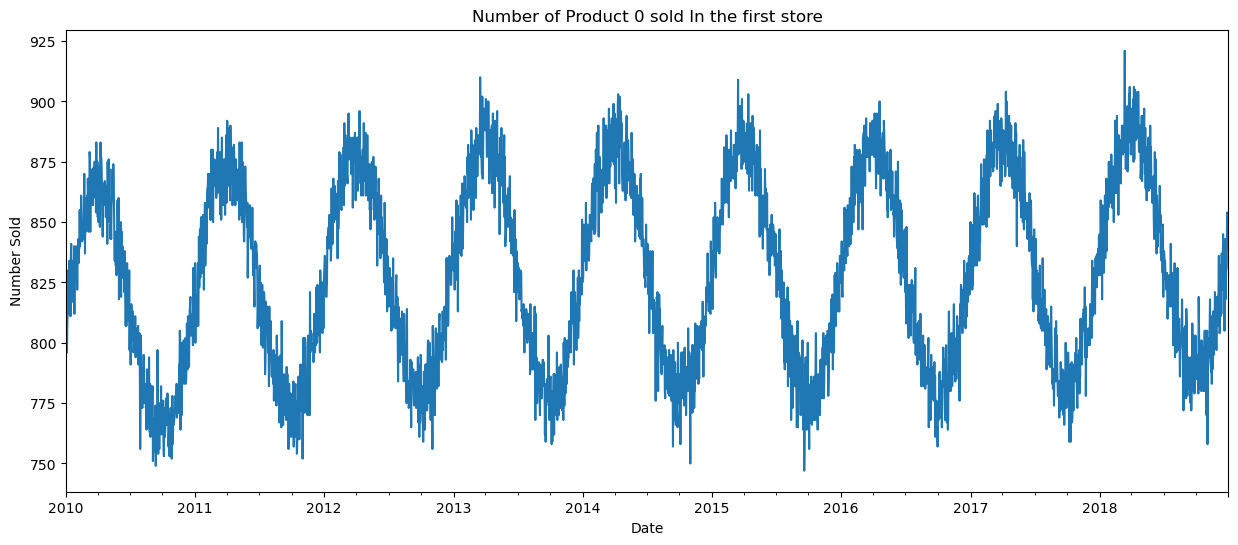

In [15]:
s1p1['number_sold'].plot(figsize = (15, 6), title='Number of Product 0 sold In the first store', xlabel='Date', ylabel='Number Sold')

Another way to convert the "date" column to a date time format is the argument `parse_dates` of the Pandas read_csv method.

In [16]:
sales_data = pd.read_csv("train.csv", parse_dates =["Date"], index_col ="Date")

In [17]:
sales_data.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=230090, freq=None)

We can slice the dataset to access only specific parts of the time sequences.

In [18]:
sales_data[:5].index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
sales_data[:2].index

DatetimeIndex(['2010-01-01', '2010-01-02'], dtype='datetime64[ns]', name='Date', freq=None)

We can also specifies a stop time.

In [20]:
sales_data['2018-12-22':'2018-12-27']

,store,product,number_sold
Date,,,
2018-12-22,0,0,843
2018-12-23,0,0,818
2018-12-24,0,0,826
2018-12-25,0,0,831
2018-12-26,0,0,831
...,...,...,...
2018-12-23,6,9,911
2018-12-24,6,9,893
2018-12-25,6,9,888


We will calculate some summary statistics. The describe() function creates a summary of the loaded dataset's distribution.

In [21]:
sales_data.describe()

,store,product,number_sold
count,"230,090.00","230,090.00","230,090.00"
mean,3.00,4.50,780.93
std,2.00,2.87,204.10
min,0.00,0.00,238.00
25%,1.00,2.00,722.00
50%,3.00,4.50,835.00
75%,5.00,7.00,914.00
max,6.00,9.00,"1,205.00"


For numeric data, the result consists of count, mean, std, min, and max statistics as well as lower, 50, and upper percentils.

In [22]:
# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
warnings.filterwarnings("ignore")

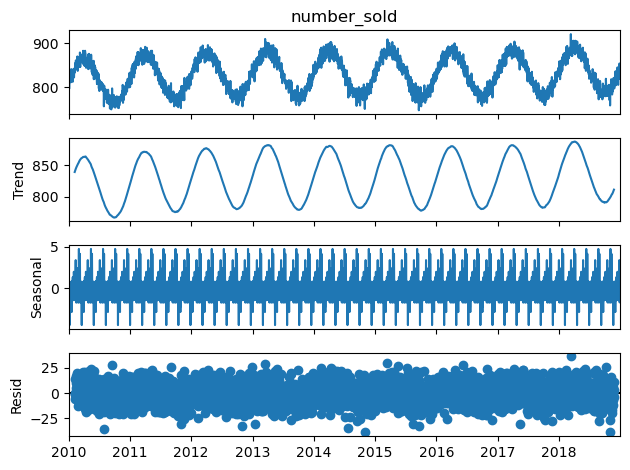

In [23]:
sales_data_load = s1p1['number_sold']
decomfreq=6*12
decomposition = sm.tsa.seasonal_decompose(sales_data_load, model = 'additive',period=decomfreq)
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [10.0, 6.0]

To investigate the trend in the dataset, we can plot the trend alongside the observed time series. We can use Matplotlib's .YearLocator().

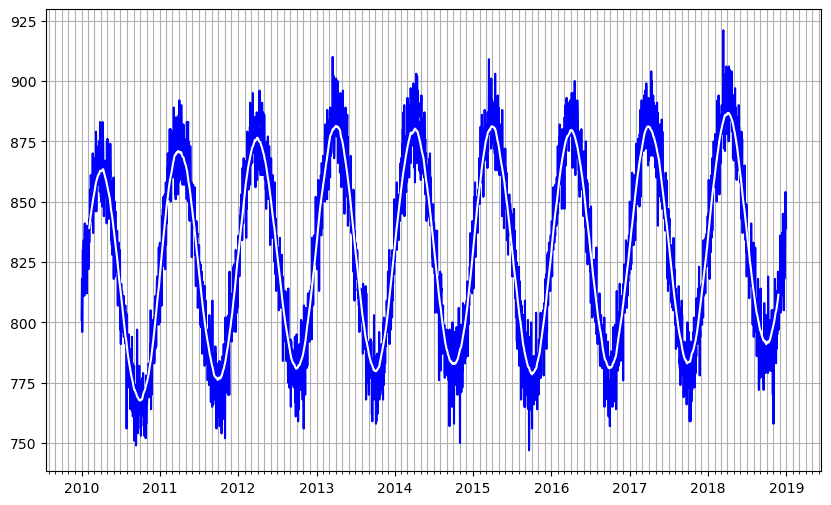

In [24]:
decomfreq=6*12
decomposition = sm.tsa.seasonal_decompose(sales_data_load, model = 'additive',period=decomfreq)

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1) 

year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m') 

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(sales_data_load.index, sales_data_load, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='white')

## Time Series Data Normalisation and Standardisation

Normalisation is the process of translating data into the range of [1,0]. The objective of normalisation is that the features are on the same scale. 

In [25]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

In [26]:
# prepare data for normalization
values = sales_data_load.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 747.000000, Max: 921.000000


In [27]:
# normalize the data set and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5): 
    print(normalized[i])

[0.31]
[0.36]
[0.41]
[0.28]
[0.35]


In [28]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5): 
    print(inversed[i])

[801.]
[810.]
[818.]
[796.]
[808.]


Standardisation is the process of rescaling data to fit a standard normal distribution. A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1.

In [29]:
# Standardize time series data
from sklearn.preprocessing import StandardScaler
from math import sqrt 

In [30]:
# prepare data for standardization
values = sales_data_load.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 828.676909, StandardDeviation: 38.397140


In [31]:
# standardization the data set and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5): 
    print(normalized[i])

[-0.72]
[-0.49]
[-0.28]
[-0.85]
[-0.54]


In [32]:
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5): 
    print(inversed[i])

[801.]
[810.]
[818.]
[796.]
[808.]


## Time Series Feature Engineering

We need to remodel the time series data  as a supervised learning dataset before we can start using machine learning algorithms.

### Date Time Features

#### Working with Date Time Index

In [33]:
parsed_dates = sales_data.index

In [34]:
sales_data['hour'] = [parsed_dates[i].hour for i in range(len(sales_data))]
sales_data['day of week'] = [parsed_dates[i].day for i in range(len(sales_data))]
sales_data['day name'] = [parsed_dates[i].day_name() for i in range(len(sales_data))]
sales_data['month'] = [parsed_dates[i].month for i in range(len(sales_data))]
sales_data['days in month'] = [parsed_dates[i].days_in_month for i in range(len(sales_data))]
sales_data['month start'] = [parsed_dates[i].is_month_start for i in range(len(sales_data))]
sales_data['month end'] = [parsed_dates[i].is_month_end for i in range(len(sales_data))]
sales_data['quarter'] = [parsed_dates[i].quarter for i in range(len(sales_data))]
sales_data['quarter start'] = [parsed_dates[i].is_quarter_start for i in range(len(sales_data))]
sales_data['year'] = [parsed_dates[i].year for i in range(len(sales_data))]
sales_data['is leap year'] = [parsed_dates[i].is_leap_year for i in range(len(sales_data))]
print(sales_data.head(5))

            store  product  number_sold  hour  day of week  day name  month  \
Date                                                                          
2010-01-01      0        0          801     0            1    Friday      1   
2010-01-02      0        0          810     0            2  Saturday      1   
2010-01-03      0        0          818     0            3    Sunday      1   
2010-01-04      0        0          796     0            4    Monday      1   
2010-01-05      0        0          808     0            5   Tuesday      1   

            days in month  month start  month end  quarter  quarter start  \
Date                                                                        
2010-01-01             31         True      False        1           True   
2010-01-02             31        False      False        1          False   
2010-01-03             31        False      False        1          False   
2010-01-04             31        False      False        1   

#### Working with Time Deltas

We could add a datetime column to represent an expiration date which is 30 date from original date.

In [35]:
sales_data['expiration date'] = parsed_dates + pd.Timedelta(days=30)
sales_data['expiration date']

Date
2010-01-01   2010-01-31
2010-01-02   2010-02-01
2010-01-03   2010-02-02
2010-01-04   2010-02-03
2010-01-05   2010-02-04
                ...    
2018-12-27   2019-01-26
2018-12-28   2019-01-27
2018-12-29   2019-01-28
2018-12-30   2019-01-29
2018-12-31   2019-01-30
Name: expiration date, Length: 230090, dtype: datetime64[ns]

We could add another datetime column to represent an extended warranty which is 35 days 12 hours 30 minutes.

In [36]:
sales_data['extended warranty'] = parsed_dates + pd.Timedelta('35 days 12 hours 30 minutes')
sales_data['extended warranty']

Date
2010-01-01   2010-02-05 12:30:00
2010-01-02   2010-02-06 12:30:00
2010-01-03   2010-02-07 12:30:00
2010-01-04   2010-02-08 12:30:00
2010-01-05   2010-02-09 12:30:00
                     ...        
2018-12-27   2019-01-31 12:30:00
2018-12-28   2019-02-01 12:30:00
2018-12-29   2019-02-02 12:30:00
2018-12-30   2019-02-03 12:30:00
2018-12-31   2019-02-04 12:30:00
Name: extended warranty, Length: 230090, dtype: datetime64[ns]

We could also calculate the delta between two dates. Since both dates are datetime data types, we can achieve this with a simple substraction between two columns.

In [37]:
sales_data['extended warranty'] - sales_data['expiration date']

Date
2010-01-01   5 days 12:30:00
2010-01-02   5 days 12:30:00
2010-01-03   5 days 12:30:00
2010-01-04   5 days 12:30:00
2010-01-05   5 days 12:30:00
                   ...      
2018-12-27   5 days 12:30:00
2018-12-28   5 days 12:30:00
2018-12-29   5 days 12:30:00
2018-12-30   5 days 12:30:00
2018-12-31   5 days 12:30:00
Length: 230090, dtype: timedelta64[ns]

#### Working with date offsets

With pandas.tseries.offsets.BusinessDay() function we can create an offset of business days.

In [38]:
sales_data['Business Day'] = sales_data.index + pd.offsets.BDay(0)
sales_data['Business Day']

Date
2010-01-01   2010-01-01
2010-01-02   2010-01-04
2010-01-03   2010-01-04
2010-01-04   2010-01-04
2010-01-05   2010-01-05
                ...    
2018-12-27   2018-12-27
2018-12-28   2018-12-28
2018-12-29   2018-12-31
2018-12-30   2018-12-31
2018-12-31   2018-12-31
Name: Business Day, Length: 230090, dtype: datetime64[ns]

In [39]:
sales_data['Quarter End'] = sales_data.index + pd.offsets.QuarterEnd(0)
sales_data['Quarter End']

Date
2010-01-01   2010-03-31
2010-01-02   2010-03-31
2010-01-03   2010-03-31
2010-01-04   2010-03-31
2010-01-05   2010-03-31
                ...    
2018-12-27   2018-12-31
2018-12-28   2018-12-31
2018-12-29   2018-12-31
2018-12-30   2018-12-31
2018-12-31   2018-12-31
Name: Quarter End, Length: 230090, dtype: datetime64[ns]

In [40]:
sales_data['Month End'] = sales_data.index + pd.offsets.MonthEnd(0)
sales_data['Month End']

Date
2010-01-01   2010-01-31
2010-01-02   2010-01-31
2010-01-03   2010-01-31
2010-01-04   2010-01-31
2010-01-05   2010-01-31
                ...    
2018-12-27   2018-12-31
2018-12-28   2018-12-31
2018-12-29   2018-12-31
2018-12-30   2018-12-31
2018-12-31   2018-12-31
Name: Month End, Length: 230090, dtype: datetime64[ns]

### Lag Features and Window Features

We can predict the value at the next time step given the value at the previous time step. The underlying assumption is that was happened in the past can influence the future. The pandas shift( ) function helps to create these lag features from a time series dataset. 

In [41]:
ts_data['Lag1'] = ts_data['number_sold'].shift(1) # Lag with 1 day
ts_data['Lag2'] = ts_data['number_sold'].shift(3) # lag with 3 days
ts_data['Lag3'] = ts_data['number_sold'].shift(5) # lag with 5 days
ts_data

,store,product,number_sold,Lag1,Lag2,Lag3
Date,,,,,,
2010-01-01,0,0,801,NaN,NaN,NaN
2010-01-02,0,0,810,801.00,NaN,NaN
2010-01-03,0,0,818,810.00,NaN,NaN
2010-01-04,0,0,796,818.00,801.00,NaN
2010-01-05,0,0,808,796.00,810.00,NaN
...,...,...,...,...,...,...
2018-12-27,6,9,890,896.00,893.00,931.00
2018-12-28,6,9,892,890.00,888.00,911.00
2018-12-29,6,9,895,892.00,896.00,893.00


### Rolling Window Statistics

One of the more popular rolling statistics is the moving average. The moving average calculates the mean of that time period as the current value. Pandas rolling() function provides rolling window calculations. It creates a new data structure with the window of values at each time step.

In [42]:
number_sold = pd.DataFrame(ts_data['number_sold'].values)
shifted = number_sold.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, number_sold], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe.head(5))

   mean(t-2,t-1)  t+1
0            NaN  801
1            NaN  810
2         805.50  818
3         814.00  796
4         807.00  808


In [43]:
window = shifted.rolling(window=3)
means = window.mean()
new_dataframe = pd.concat([means, number_sold], axis=1)
new_dataframe.columns = ['mean(t-3,t-2,t-1)', 't+1']
print(new_dataframe.head(10))

   mean(t-3,t-2,t-1)  t+1
0                NaN  801
1                NaN  810
2                NaN  818
3             809.67  796
4             808.00  808
5             807.33  812
6             805.33  830
7             816.67  812
8             818.00  817
9             819.67  832


### Expanding Window Statistics

Pandas expanding( ) function provides expanding window calculations.

In [44]:
# create expanding window features
number_sold = pd.DataFrame(ts_data['number_sold'].values)
window_exp = number_sold.expanding()
dataframe = pd.concat([window_exp.min(), window_exp.mean(), window_exp.max(), number_sold.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

     min   mean    max    t+1
0 801.00 801.00 801.00 810.00
1 801.00 805.50 810.00 818.00
2 801.00 809.67 818.00 796.00
3 796.00 806.25 818.00 808.00
4 796.00 806.60 818.00 812.00
